## 1.1 Explanation of Design and Implementation Choices of your Model

### To obtain the best algorithm, i worked with several different pairs of feature extraction techniques and classification techniques to finally conclude on which pair works the best :-
### The Best accuracy was obtained on using a combination of "Min-Max Scalar" + " PCA" + "SVM". In the Following section, I will be breaking down as to how i achieved this combination. 
### Part 1) Choosing the best normalization/Scaling technique. 
#### - First of, normalization is crucial as it brings all the feature columns to a common scale, without distorting the differences in the range of values. Moreover, it is advisable to normalize the dataset before using feature extraction techniques, as it makes the computations faster. 
#### - There are wide variety of normalization techniques that I've tried on the dataset. Each of these techniques gave varying results.
#### - Various Sklearn based techniques such as the Standard scalar, Robust Scalar and the normalizer were utilized in addition to the MinMax Scalar technique.
#### - The accuracy of each technique on the dataset was in the order of Min-Max Scalar > Robust Scalar > Standard Scalar > Normalizer.
#### - The reason why Min- Max scalar performed better over the rest, was the fact that it is sensitive to the outliers in the dataset, unlike standard scalar technique which rescales data to give it the shape of a normal distribution. Robust scalar performed slightly better than Standard scalar, but not as good as Min-Max scalar is because it dosen't take into account all the effects of the outliers, unlike the Min-Max scalar.
#### - Now in the next half, we will discuss which feature extraction technique works best on the dataset.
### Part 2) Choosing the best feature extraction technique:-
#### - The main reason why feature extraction is being utilized in this algorithm, is to perform dimentionality reduction on the original dataset, such that classification on the dataset can be carried out much faster.
#### - Initially, I began with implementing linear techniques on the dataset, followed by a bunch of non-linear schemes for comparison.
#### While carrying out feature extraction, I figured out that PCA on it's own, without any classification techniques ( KNN, SVM , DTC etc.) performs the worst in comparison to LDA and rest of the Non-linear dimensionality reduction techniques( T-SNE, Isomap etc.).
#### But, when PCA was performed in conjuction with the different classification techniques, the accuracy of classification on the test dataset was the best, in comparison to LDA or any of the non-linear methods when perfomed with diffferent classification techniques or even when they were performed alone.
#### - One of the reasons why PCA performs better with these classification techniques than LDA, is the fact that PCA does take into account for any correlation between the resulting features (since it is unsupervised), acting solely with the purpose of reducing dimensions. This allows the classification technique to train the model, as it would with the original set of features( Since LDA incoroporates the in-between scatter, it makes it hard for the classifcation technique to capture all the details of the original dataset).
#### - Likewise, utilizing non-linear feature extraction technique alongside a classification technique dosen't help as most of these techniques are very stochastic in nature, meaning that most of these methods have multiple minima that might lead to different solutions, unlike PCA which is deterministic in nature.
#### - Apart from giving a lower accuracy on the test dataset, these techniques are very computationally expensive. When the model was being trained only with T-SNE, it took about 30 minutes to compute. When T-SNE was computed alongside a classification technique, it took about 3 hours !! 

#### - The above few reasons suffice to show as to why PCA is apt in this scenario.
### Part 3) Choosing the best Classification technique:-
#### - There are wide variety of classification techniques that i have experimented with in this section, and finally concluded that SVM is the best choice in this scenario.
### (KNN)
#### -  K-nearest neighbours, is one the most basic models used in supervised learning. It is a basic non-parametric method, the classifies data, on the basis of their nearest neighbours.
#### - The KNN models are very simple, and also very computationally efficient.
#### -Initially, the training dataset was divided into 90% training and 10% for validation. After several iterations over a range of different values of 'K', it was finally concluded that the model developed with K = 20 on 60 PCA components, performed the best on the actual test dataset giving an accuracy of 87.1%.
#### - There were attempts made to improve the accuracy by generalizing the model a bit more, through cross validation ( CV=10), but the accuracy of the model's prediction on the test dataset didn't improve.
#### - The best KNN based algorithm can be accesed from the learn dropbox.

### (Decision tree classifier, Random Forests and Gradient Tree Boosting)
#### - As we have learned in lecture, Decision tree classifiers and random forests built tree-like models, to capture almost every aspect of the dataset.
#### - In the case of all the above mentioned algorithms, the accuracy achieved was comparitively much lower than that of KNN.
#### - For hyperparameter tuning, 'GridSearchCV' was utilized, and the maximum accuracy obtained from the Decision tree classifier and Random forest was 78.5% and 82% respectively. While Gradient tree boosting performed the worst with a maximum of 72% accuracy.
#### - The random forest based algorithm can be accesed from the learn dropbox. 
### (SVM)
#### - Support vector machines, performed the best over all the other classifcation techniques as it provided the highest accuracy in comparison to the rest of the classification algorithms. 
#### - The simplest way to describe this classifier, is that it chooses an apt hyperplane, such that the data is linearly seperable.
#### - For this as well, i opted for 'GridSearchCV' to obtain the best set of hyperparameters for tuning the model. It was concluded that the 'RBF Kernal' with regulazation parameter of 10 ( C_param = 10) on 60 PCA componenets provided the highest accuracy of 90.100%.
#### - The only painstaking portion of this classifier is that it is computationally very expensive. But using PCA helps, as it significantly reduces the computation time. 
#### - The algorithm has been explained in the below section in blocks. The entire code can be accessed from the learn dropbox too.

### Note - The codes for individual models, have been posted on learn in descending order of their accuracies on the test dataset.

## 1.2:  Implementation of your Design Choices 

### Block 1 ( Splitting the dataset provided into training and testing)

In [ ]:
X = data_f.iloc[:,2:]
y = data_f.iloc[:,1]
final_test = test.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

#### - A split of 90% training and 10% testing data was carried out the provided fashion MNIST dataset, before predicting the accuracy of the model with the actual test dataset.
#### - The final test block represents the actual test dataset to be experimented on.

### Block 2 ( Standardization of data)

In [ ]:
Std_scale =MinMaxScaler().fit(X_train,y_train)
X_train = Std_scale.transform(X_train)
X_test  = Std_scale.transform(X_test)
final_test = Std_scale.transform(final_test)

#### - As per usual, the Standardization of the datset has been carried out using the Min-Max scalar technique (from sklearn).
#### - Standardization of the dataset makes the computations faster, and is also apt while using PCA.

### Block 3 ( Performing Feature Extraction)

In [ ]:
pca_std = PCA(n_components=60).fit(X_train,y_train)
X_train_std = pca_std.transform(X_train)
X_test = pca_std.transform(X_test)
test_std = pca_std.transform(final_test)

#### - An essential step towards developing a good algorithm, is to obtain the best set of features. In this case PCA does exactly that, by forming new set of features.
#### - This dimensionality reduction step is crucial in the build up towards the classifier, as it provides faster classification of the dataset.

### Block 4 ( Performing Classification)

In [ ]:
C_param = [5,10,15,20,50]
accu_scr_param ={}
accu_scr_param_list=[]
for K in C_param :
    svm_clf = svm.SVC(C=K)
    # Training carried on the dataset
    svm_clf.fit(X_train_std, y_train)
    # Predictions are made on the test dataset.
    predicted_y_data = svm_clf.predict(X_test)
    accu_scr_param[k] = metrics.accuracy_score(y_val,predicted_y_data)
    #Storing all the accuracy scores in a list, makes it much easier while plotting data.
    accu_scr_param_list.append(metrics.accuracy_score(y_val,predicted_y_data))
print(accu_scr_param_list)

#### - As can be seen, the best performing model is decided by the basis of which regularization parameter in the case of SVM perfoms the best on the test dataset. 
#### - Once the best perfoming model is obtained, it is tested on the actual test dataset.

### Block 5 (Testing on actual dataset)

In [ ]:
C_param = [10]
accu_scr_param ={}
accu_scr_param_list=[]
for K in C_param :
    svm_clf = svm.SVC(C=K)
    # Training carried on the dataset
    svm_clf.fit(X_train_std, y_train)
    # Predictions are made on the test dataset.
    predicted_y_data = svm_clf.predict(test_std)
# Developing a submission file to submit the predictions on learn
submission = pd.DataFrame({'Id':test['Id'],'Label':predicted_y_data})
filename = 'Fashion MNIST predictions1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

#### - The best perfoming model is experimented on the actual test dataset( as seen above), followed by developing a .csv file to upload the predictions on Kaggle.

## 1.3: Kaggle Competition Score 

### - The highest score obtained on Kaggle by me, was about 90.100%, while utilizing the combination, "Min-Max Scalar" + "PCA" + "SVM".
### - There are many factors that might result in varying results for different teams, to name a few:-
#### - Using different classification techniques can provide varying results, some teams getting testing accuracy less than 84-85% maybe due to the fact that they're using either Decision tree classifier, Random Forests, Gradient Tree Boosting or multi-layered percetrons. Using KNN  can give a maximum accuracy of 87.5% atleast on the dataset, while using SVM's could give accuracies higher than 88% surely.
#### - Using different Standardization techniques, since each form of standardization favours a certian form of distribution.
#### - Using different set of hyperparameters. Some teams might have found the different cut-offs and must've resulted in different test data accuracies.
#### - It is also possible that, they might've opted for different feature selection or feature extraction techniques. This could also result in differences in accuracy of the model.

## 1.4: Results Analysis

### Part 1) Runtime Performance :-
#### - Since there are several componenets that come into picture, while training the data. Therefore it takes longer amount of time to execute them.
#### - Time for training the model :- 141.47345900535583 seconds
#### - Time for testing the model :- 21.293099403381348 seconds
#### - As we can see that training the model, with the ideal parameter and ideal set of componenets takes about 2.37 minutes.This computation, which usually takes atleast about 20 minutes to perform, was accelerated with the help of the GPU power.
#### - This is comparitively slower to the KNN, Decision tree boosting, Random forest and Gradient tree boosting execution times. 
#### -As the regularization parameters and the 'n' componenets of PCA also increase, then so does the training period of the model.

### Part 2) Comparison of the different algorithms and parameters you tried:-
#### As discussed previously, there are several sets of algorithms i have tried on the dataset:-
#### 1) " Standard scalar" + "PCA" + "KNN" = In this case i opted for 20 PCA components, followed by 100 K-neighbours for the algorithm. This provided an accuracy of  79.2% on the validation set, while 78.9% on the actual test dataset.
#### 2) "Standard Scalar" + "PCA" + "KNN" = In this case, i first prefered plotting a scree plot to check how much information each of the PCA components preserve. I came to a conclusion that the first 60 componenets preserve almost 95% of the data. Therefore, i tried implementing the algorithm with 60 PCA componenets and 20 K-neighbours ( came down to 20, by computing the same algorithm over a varying range). This combination gave an accuracy of 84.6% on the actual test dataset.
#### 3) Implementing the above algorithm, with different dimensionality reduction techniques(Linear - LDA, Non-Linear-( Isomap, T-SNE)). Each of these dimensionality reduction techniques when performed with "KNN" provided accuracies, well below 75%. Moreover these techniques were very time consuming, The non-linear methods took as long as 1.5 hrs to compute.
#### 4) "Min-Max Scalar" + "PCA" + "KNN" = In this case, i opted for different scaling technique, while operating on 60 PCA components and 20 K neighbours. The accuracy of this combination jumped upto about 87.5%, which indicated that the outliers are also important in this situation(which is been taken care of by the Min-Max scalar technique). 
#### 5) "Min-Max Scalar" + "PCA" + "Decision tree classifier /Random Forests /Gradient Tree Boosting" = In this case, for hyperparameter tuning, 'GridSearchCV' was utilized, and the maximum accuracy obtained from the Decision tree classifier and Random forest was 78.5% and 82% respectively. While Gradient tree boosting performed the worst with a maximum of 72% accuracy. Indicating that Niether of the tree classifiers do outperform KNN.
#### 6) "Min-Max Scalar" + "PCA" + "SVM" - As discussed before this provided the highest accuracy of all, the discussion on this half, will be disscused in part 3

### Part 3) Explanation of your model.
#### - So as we've disscused in part 2, the maximum accuracy was obtained so far, was by the KNN classification technique  87.5%.
#### - When the SVM classifier was utilized the model started performing much better on the test data.
#### - I began by finding the right combination of the type of kernal and the number of parameters.
#### - Initially,I began with the 'linear' kernal, over a range of 0 to 50 as the regularization parameter. There wasn't any significant increase in accuracy, as the best regularization parameter( C_param = 10) could only give an accuracy of 85% on the validation dataset, while an accuracy of 82.5% on the actual test dataset dataset.On a side note this kernal took the longest amount of time to compute over a range of 50 parameters, as compared to the rest of the kernals.
#### - I ran the same process with the 'poly' kernal, for a degree range of 3 to 10, each over a range of 0 to 50 as the regularization parameter. The 'poly' kernal with a degree of 6, at C_param = 10 performed the best, with an overall acccuracy of 88% on the validation dataset, while an accuracy of 88.7% on the actual test dataset. This was certainly an improvement over the KNN predicted model. I tried several other iterations, trying to improve the model's performance, but 88.7% was the highest with this kernal.
#### - Lastly, comes the default kernal - the 'rbf' kernal. On working with this kernal over a range of 0 to 50 regularization pramaeters, the regularization parameter of 10, gave the highest performance of 89.8% on the validation dataset, while an overall accuracy of 90.10% on the actual test dataset. 
#### -As a last ditch effort, i also tried varying several the PCA componenets ( almost around 100 PCA components, project atleast 99% of the data), followed by different scaling techniques as well, but these changes didn't improve the perfomance of the model on the actual test dataset. 

### Part 3) ROC curve

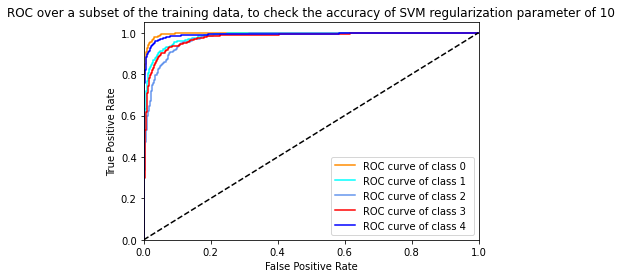

#### - As can be seen above the ROC was plotted for the finalized parameter ( SVM with 10 as the regularization parameter) and the "rbf" kernal.
#### - As it is known in the case of ROC that, the top left corner is the ideal point. Most of the classes are closer to this 'ideal point'.
#### - Class 0 and 4 have the highest true positive rate on the subset of the data. While classes 2,3,1 have the least true positive rate on the subsest of the data.
#### - The true positive rates for the classes can be ranked as Class 0 > Class 4 > Class 1 > Class 3> Class 2

### Part 4) Evaluate your code with other metrics on the training data :-
#### - As can be seen previously in section 1.2, block 5, the model's accuracy has been tested on a validation set ( which was 10% of the training data). Over a several range of the regularization parameters.
#### - The Classification accuracy on the validation set was the highest when the regularization parameter was chosen as 10.


In [1]:
#Importing all the neccesary libraries
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix

#Importing the datasets
data_f = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')

X = data_f.iloc[:,2:]
y = data_f.iloc[:,1]
final_test = test.iloc[:,1:]

# Splitting data into training and testing (90% for training and 10% for testing )
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

#Standardizing the dataset
Std_scale =MinMaxScaler().fit(X_train,y_train)
X_train = Std_scale.transform(X_train)
X_test  = Std_scale.transform(X_test)
final_test = Std_scale.transform(final_test)

#Using Principal componenet analysis for dimensionality reduction
pca_std = PCA(n_components=60).fit(X_train,y_train)
X_train_std = pca_std.transform(X_train)
X_test = pca_std.transform(X_test)
test_std = pca_std.transform(final_test)

#Performing Support vector machine classification technique, on the reduced dataset 
C_param = [5,7,10,20,50]
accu_scr_param ={}
accu_scr_param_list=[]
for K in C_param :
    svm_clf = svm.SVC(C=K,gamma='scale')
    # Training carried on the dataset
    svm_clf.fit(X_train_std, y_train)
    # Predictions are made on the test dataset.
    predicted_y_data = svm_clf.predict(X_test)
    accu_scr_param[K] = metrics.accuracy_score(y_test,predicted_y_data)
    #Storing all the accuracy scores in a list, makes it much easier while plotting data.
    accu_scr_param_list.append(metrics.accuracy_score(y_test,predicted_y_data))
print('The accuracy obtained on the validation sets, is as follows:-' ,accu_scr_param_list)

The accuracy obtained on the validation sets, is as follows:- [0.8941666666666667, 0.8968333333333334, 0.8976666666666666, 0.8951666666666667, 0.895]


#### - As can be seen, when the regularization parameter was considered as 10, it provided the highest amount of accuracy on the validation set, which suffices to prove that it is bound to perform the best on the actual test dataset.